In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from scipy import stats
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
plt.rcParams["mathtext.fontset"] = "dejavusans"
rc('mathtext', fontset='stixsans')

## Processing Steps (Skip to plotting to directly read in the glacier-wide elevation change data and plot)

### Read in results and glacier-wide data (Shean et al., 2020)

In [2]:
# filename = './results_final/combined_final.feather'
# results = pd.read_feather(filename)

# mb_data = pd.read_csv('../NEW_VOID/dshean/data/mb/hma_mb_20190215_0815_rmse.csv')

### Filter results by region and get all unique RGIIds

In [3]:
# ehim = results[results['reg'] == 'ehim']
# whim = results[results['reg'] == 'whim']

# mb_ehim = mb_data[mb_data['RGIId'].isin(ehim['RGIId'].unique())]
# mb_ehim['reg'] = 'ehim'
# mb_whim = mb_data[mb_data['RGIId'].isin(whim['RGIId'].unique())]
# mb_whim['reg'] = 'whim'

### Function to calculate glacier wide surface elevation change

In [4]:
# def calc_glacier_wide(rgiid, gdf, gmb, verbose = False):
#     methods = ['constant_mean', 'hypsometric_mean', 'xgb']
#     mb = gmb['dhdt_ma'].iloc[0]
#     sigma_mb = gmb['dhdt_ma_sigma'].iloc[0]
#     area = gdf['Area'][0]
#     if verbose:
#         print('MB: ', mb)
#     m_to_km = 30*30/1000000
#     dhdt_preds = [rgiid, mb, sigma_mb]
    
#     for method in methods:
#         dhdt = gdf[method]
#         dhdt_pred1 = (m_to_km * np.sum(dhdt) / area)
#         # dhdt_preds.append(dhdt_pred1 - mb)
        
#         dhdt_pred2 = np.mean(dhdt)
#         dhdt_preds.append(dhdt_pred2 - mb)
        
#         if verbose:
#             print('Diff1: ', dhdt_pred1 - mb)
#             print('Diff2: ', dhdt_pred2 - mb)
#             # print('2: ', method, dhdt_pred2)
#     # print(dhdt_preds1)

#     return dhdt_preds

### Calculate glacier-wide surface elevation change for each glacier in the Eastern Himalaya

In [5]:

# edhdts = []

# i = 0

# for rgiid in ehim['RGIId'].unique():
#     gdf = ehim[ehim['RGIId'] == rgiid]
#     gmb = mb_ehim[mb_ehim['RGIId'] == rgiid]
#     dhdt = calc_glacier_wide(rgiid, gdf, gmb)
#     # print(dhdt)
#     edhdts.append(dhdt)

#     i += 1
#     # if i > 0:
#     #     break
# col = ['RGIId', 'dhdt_ma','sigma_dhdt_ma', 'con', 'hyp', 'xgb']
# edf = pd.DataFrame(edhdts, columns = col)
# edf2 = edf.melt(id_vars = ['RGIId', 'dhdt_ma', 'sigma_dhdt_ma'], value_vars = ['con', 'hyp', 'xgb'], var_name = 'method', value_name = 'diffdhdt')

### Calculate glacier-wide surface elevation change for each glacier in the Western Himalaya

In [6]:
# wdhdts = []

# i = 0

# for rgiid in whim['RGIId'].unique():
#     gdf = whim[whim['RGIId'] == rgiid]
#     gmb = mb_whim[mb_whim['RGIId'] == rgiid]
#     dhdt = calc_glacier_wide(rgiid, gdf, gmb)
#     # print(dhdt)
#     wdhdts.append(dhdt)

#     i += 1
#     # if i > 0:
#     #     break
# col = ['RGIId', 'dhdt_ma','sigma_dhdt_ma', 'con', 'hyp', 'xgb']
# wdf = pd.DataFrame(wdhdts, columns = col)
# wdf2 = wdf.melt(id_vars = ['RGIId', 'dhdt_ma', 'sigma_dhdt_ma'], value_vars = ['con', 'hyp', 'xgb'], var_name = 'method', value_name = 'diffdhdt')

## Plotting Steps

In [2]:
dhdt_diffs = pd.read_feather('./results/glacier_wide_results.feather')
ehim = dhdt_diffs[dhdt_diffs['reg'] == 'ehim']
whim = dhdt_diffs[dhdt_diffs['reg'] == 'whim']

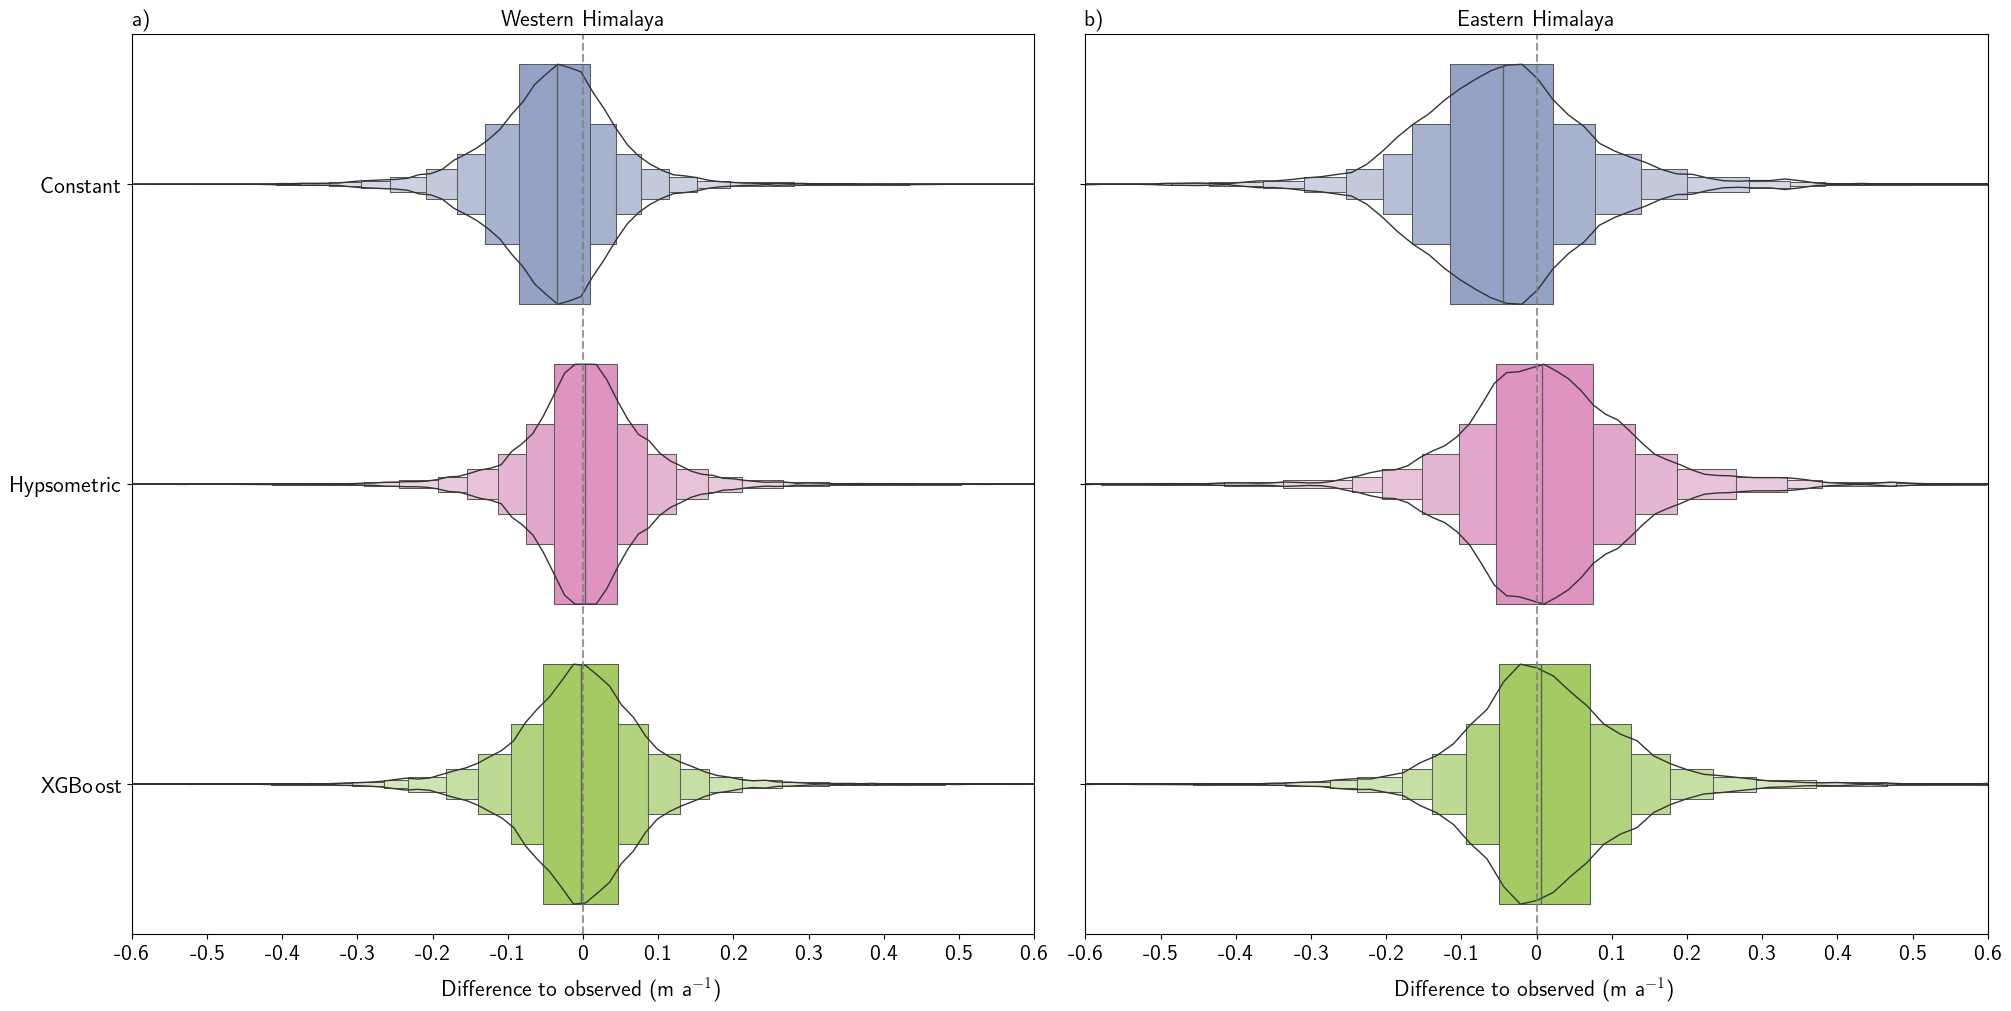

In [3]:
fig, axs = plt.subplot_mosaic([['a)', 'b)']], figsize = (20,10), sharex = True, sharey = True, layout = 'constrained')

for label, ax in axs.items():
    ax.set_title(label, fontfamily='sans-serif', loc='left', fontsize=16)
    
ax1 = axs['a)']
ax2 = axs['b)']

sns.set_style('white')
cmap = sns.color_palette('Set2')[2:5]
cmap2 = ['#333333', '#333333', '#333333']
box1 = sns.boxenplot(data = whim, x = 'diffdhdt', y = 'method', hue = 'method', saturation = 0.8, palette = cmap, showfliers = False, ax = ax1)
vio1 = sns.violinplot(data = whim, x = 'diffdhdt', y = 'method', hue = 'method', ax = ax1, inner = None, palette = cmap2, bw_adjust = 0.5, fill = False, linewidth = 1)

box2 = sns.boxenplot(data = ehim, x = 'diffdhdt', y = 'method', hue = 'method', saturation = 0.8, palette = cmap, showfliers = False, ax = ax2)
vio2 = sns.violinplot(data = ehim, x = 'diffdhdt', y = 'method', hue = 'method', inner = None, palette = cmap2, bw_adjust = 0.5, fill = False, linewidth = 1, ax = ax2)

ax1.axvline(0, color='gray', linestyle='--', alpha=0.8)
ax2.axvline(0, color='gray', linestyle='--', alpha=0.8)

ax1.set_xlim([-.5,.5])

ax1.set_title('Western Himalaya', fontsize = 16)
ax2.set_title('Eastern Himalaya', fontsize = 16)
ax1.set_xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 
               labels = ['-0.6', '-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'], 
               fontsize = 16)
ax2.set_xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6], 
               labels = ['-0.6', '-0.5', '-0.4', '-0.3', '-0.2', '-0.1', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6'], 
               fontsize = 16)
ax1.set_yticks([0,1,2], labels = ['Constant', 'Hypsometric', 'XGBoost'], fontsize = 16)

ax1.set_xlabel('Difference to observed (m a$^{-1}$)', fontsize = 16, labelpad = 10)
ax2.set_xlabel('Difference to observed (m a$^{-1}$)', fontsize = 16, labelpad = 10)
ax1.set_ylabel('')
ax2.set_ylabel('')

# fig.tight_layout()
# plt.show()
plt.savefig('./figures/glacier_box_FINAL.png', bbox_inches='tight', dpi = 300)


In [42]:
ax1.get_yticklabels()

[Text(0, 0, 'Constant'), Text(0, 1, 'Hypsometric'), Text(0, 2, 'XGBoost')]